In [1]:
## Basic
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
## Excel
import os
#import xlwt
from openpyxl import load_workbook
## Data process
from scipy.interpolate import interp1d #Interpolation∏
from scipy.signal import savgol_filter #Smo oth
import math
from math import dist
import time

#import cv2

import random
from IPython import display
# aka import ipympl

import struct


In [2]:
cm =1/2.54
def fig_pre_def(fx=8, fy=6,lw=1,dpi = 200):
    cm =1/2.54
    plt.rcParams['figure.dpi'] = dpi
    plt.rc('font', family='Helvetica')         # 自型
    plt.rcParams['axes.linewidth'] = lw     # 設置外框的寬度
    return  plt.figure(figsize=(fx*cm,fy*cm))   
    ax = fig.add_subplot(1, 1, 1)
def fig_post_def(xticks =(None,None),yticks =(None,None), 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None,
                 title=None,
                 lg_fs = 6,lb_fs = 8,
                 unit = 1/2.54, SVG = False):
    if xticks[0] != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xticks[0]))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xticks[1]))    
    if yticks[0] != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yticks[0]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(yticks[1]))
    #plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    #plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    ax.tick_params(axis='x', labelsize= lb_fs)
    ax.tick_params(axis='y', labelsize= lb_fs)
    ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
    
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=lb_fs)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=lb_fs)

    if SVG == True:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
        plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
        mpl.rcParams.update(new_rc_params)
    plt.gca().set_position([0, 0, 1, 1])


    plt.legend(fontsize=lg_fs,title=title,title_fontsize=lg_fs,frameon= False)
    plt.rcParams['figure.dpi'] = 80
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#plt.scatter(x,y, alpha=0.6,linewidth=0,s=30*cm,label=' ')
#plt.plot(x,y     ,'--ob',markersize=8*cm,linewidth=3*cm,mew=0,label='point source')
#fig_post_def()

In [3]:
def sorting(input_data, bin_number ,lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center,hist

# Import file

1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
(3000, 60)


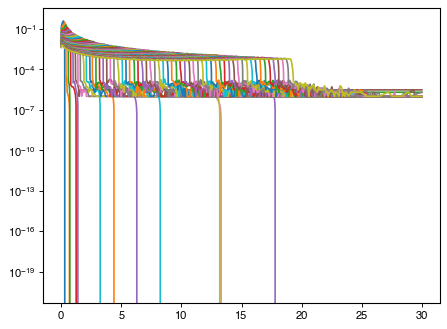

In [35]:
response_temp=[]

round_number = 1   # round the number two 0.01 unit
#new_X= np.linspace(0, 30, num=3001, endpoint=True) # interpolation 
new_X = np.arange(0,30,0.01)
simulation_response = new_X[:,np.newaxis]
for i in np.arange(1.0,30.5,0.5):
    print(str(np.round(i,1)))
    response_temp=np.loadtxt("../../data/30MeV_neutron_response/3in_EJ309_N_response_10cm_plate_all_in_one_"+str(np.round(i,1))+"MeV.txt") #Read txt file
    response_temp_binned_round=np.round(response_temp[:,2],round_number) #Set unit to 0.01MeVee
    response_temp_binned, response_temp_binned_counts = np.unique(response_temp_binned_round, return_counts=True) #counts the frequency
    interpolation_func = interp1d(response_temp_binned, response_temp_binned_counts ,fill_value="extrapolate") #interpolation
    res_counts=interpolation_func(new_X)
    res_counts[res_counts<0]=0 # eliminate the number under zero
    res_temp = res_counts[:,np.newaxis]/1000000
    #res_temp[res_temp<0.000008] = 0
    simulation_response= np.column_stack((simulation_response,res_temp))
    plt.plot(simulation_response[:,0],simulation_response[:,-1])
    plt.yscale("log")
print(simulation_response.shape)
#plt.xlim(0,3)

In [36]:
def gaussian(x, A,x0,sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
def ER_function_improve_old(x,LO,A,a,b,c):
    Gaussian_distribution = np.zeros(len(x))
    for LO_i, A_i in zip(LO,A):
        delta_E = ((a**2)*(LO_i**2)+((b**2)*LO_i)+c**2)**0.5
        sigma_ER = delta_E/2.355
        Gaussian_distribution_temp = gaussian(x,1,LO_i,sigma_ER)
        G_sum =sum(Gaussian_distribution_temp)
        if (G_sum <= 1):
            G_sum =1
        Gaussian_distribution  += A_i*Gaussian_distribution_temp/G_sum
        #plt.plot(x,A_i*Gaussian_distribution_temp/G_sum)
    return Gaussian_distribution

def Oresolution_function(input_x,input_y,alpha,beta,gamma):
    broadened_distribution = np.zeros(len(input_x))
    for LO_i,A_i in zip(input_x,input_y):
        FWHM = ((alpha**2)*(LO_i**2)+((beta**2)*LO_i)+gamma**2)**0.5
        sigma_ER = FWHM/2.355
        if (LO_i*alpha)**2+(beta*LO_i)+(gamma)**2<=0:
            sigma_ER =0
        Gaussian_distribution_temp = gaussian(input_x,1,LO_i,sigma_ER)
        G_sum = sum(Gaussian_distribution_temp)
        if Gaussian_distribution_temp[0]>0.001:
            #Gaussian_distribution_temp_with_negtive = gaussian((input_x+(input_x[0]-input_x[-1])/2),1,LO_i,sigma_ER)# shift hallf to construct the gaussin below zero
            G_sum =1
        broadened_distribution  += A_i*Gaussian_distribution_temp/G_sum
    return broadened_distribution



In [43]:
simulation_response[simulation_response<0.0001]=0

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


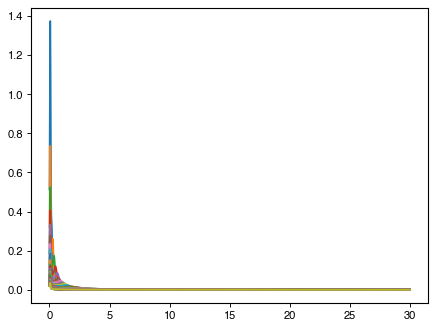

In [44]:

#GEB_response =  np.linspace(0, 30, num=3001, endpoint=True)[:,np.newaxis]
#GEB_X_initial= np.linspace(0, 30, num=3001, endpoint=True) 
GEB_response = np.arange(0,30,0.01)[:,np.newaxis]
GEB_X_initial= np.arange(0,30,0.01)

for i in np.arange(1,len(simulation_response[0,:]),1):
    print(i)
    GEB_response_final=[]
    GEB_temp=[]
    #GEB_temp = ER_function_improve_old(GEB_X_initial,GEB_X_initial,simulation_response[:,i], 0.113, 0.065, 0.06)
    GEB_temp = Oresolution_function(GEB_X_initial,simulation_response[:,i], 0.113, 0.065, 0.06)
    #
    GEB_interpolation_func = interp1d(GEB_X_initial, GEB_temp ,fill_value="linear")
    GEB_response_final=GEB_interpolation_func(GEB_response[:,0])
    
    GEB_response_final[GEB_response_final<0] =0  # 0.000000000001
    GEB_response = np.column_stack((GEB_response,GEB_response_final[:,np.newaxis]))
    plt.plot(GEB_response[:,0],GEB_response[:,-1])

(0.0001, 1)

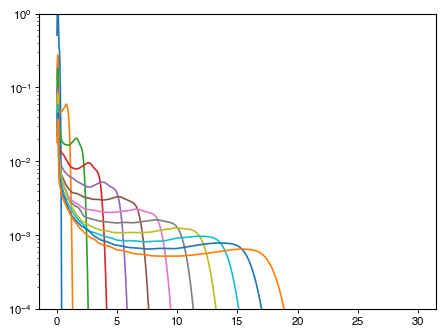

In [48]:
for i in np.arange(1,60,5):
    plt.plot(GEB_response[:,0],GEB_response[:,i])
plt.yscale("log")
plt.ylim(0.0001,1)

(3000, 60)


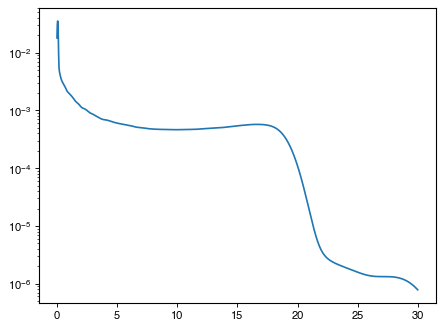

In [42]:
plt.plot(GEB_response[:,0],GEB_response[:,59])
print(GEB_response.shape)
plt.yscale('log')

In [49]:
np.savetxt("../../data/30MeV_neutron_response/20240906_neutron_response.txt",GEB_response)

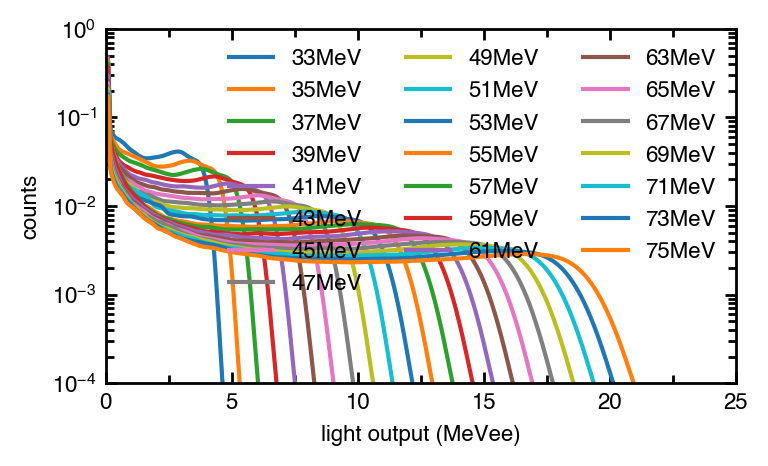

In [27]:



fig = fig_pre_def(8,4.5)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

for i in np.arange(1,len(GEB_response[0,:]),1):
    plt.plot(GEB_response[:,0],5*GEB_response[:,i],label= str(int(16+i))+ 'MeV')
plt.yscale('log')
plt.ylim(0.0001,1)

fig_post_def(xlim =(0,25),xticks=(5,2.5)#,ylim = (0.1,7000)
             #,lg_fs = 8
             ,xlabel = 'light output (MeVee)',ylabel = 'counts')
plt.legend(fontsize=8,ncol=3,frameon= False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


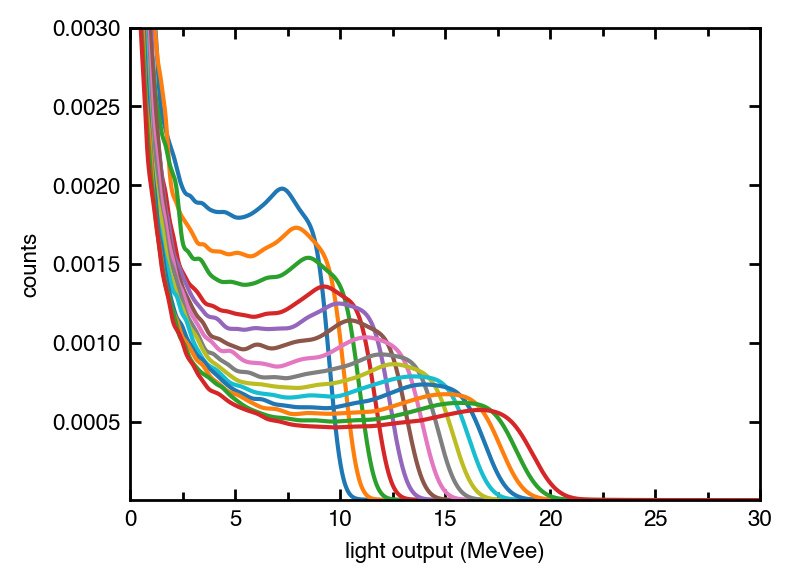

In [177]:
fig = fig_pre_def(8,6)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

for i in np.arange(1,len(GEB_response[0,:]),1):
    plt.plot(GEB_response[:,0],GEB_response[:,i])
#plt.yscale('log')
plt.ylim(0.000001,0.003)

fig_post_def(xlim =(0,30),xticks=(5,2.5)#,ylim = (0.1,7000)
             ,lg_fs = 10
             ,xlabel = 'light output (MeVee)',ylabel = 'counts')


In [ ]:
for i in np.arange(2,11.0,1.0):

    if ii ==0:
        globals()["data_"+str(int(i*10))+"MeV"] = pd.read_csv("../../../../data/NSTOF_simulation_mono_Energy/Output_exp_simulation_AmBe_source_60deg_1E8/202302_EJ309_N_scatter_exp_60deg_1E8_All_in_one_"+str(i)+"MeV_"+str(int(ii))+".txt", sep="\s+", header=None)
    else:
        temp = pd.read_csv("../../../../data/aNSTOF_simulation_mono_Energy/Output_exp_simulation_AmBe_source_60deg_1E8/202302_EJ309_N_scatter_exp_60deg_1E8_All_in_one_"+str(i)+"MeV_"+str(int(ii))+".txt", sep="\s+", header=None)
        globals()["data_"+str(int(i*10))+"MeV"] = np.vstack((globals()["data_"+str(int(i*10))+"MeV"],temp))
        

In [29]:
raw_30MeV =np.loadtxt('../../data/30MeV_neutron_response/3in_EJ309_N_response_10cm_plate_all_in_one_30.0MeV.txt')


In [70]:
raw_30MeV =np.loadtxt('../../data/30MeV_neutron_response/3in_EJ309_N_response_10cm_plate_all_in_one_30.0MeV.txt')
birks_30MeV_x, birks_30MeV_y = sorting(raw_30MeV[:,1],300,0,30)
expo_30MeV_x, expo_30MeV_y = sorting(raw_30MeV[:,2],300,0,30)
expo_30MeV_y[200:]=0


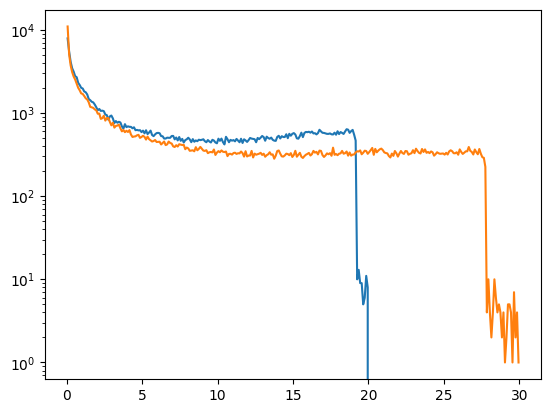

In [71]:
plt.plot(expo_30MeV_x, expo_30MeV_y)
plt.plot(birks_30MeV_x, birks_30MeV_y)
plt.yscale('log')

In [85]:
def gaussian(x, A,x0,sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
def ER_function_improve(x,LO,A,a,b,c):
    Gaussian_distribution = np.zeros(len(x))
    for LO_i, A_i in zip(LO,A):
        delta_E = ((a**2)*(LO_i**2)+((b**2)*LO_i)+c**2)**0.5
        sigma_ER = delta_E/2.355
        Gaussian_distribution_temp = gaussian(x,1,LO_i,sigma_ER)
        G_sum =sum(Gaussian_distribution_temp)
        if (G_sum <= 1):
            G_sum =1
        Gaussian_distribution  += A_i*Gaussian_distribution_temp/G_sum
        #plt.plot(x,A_i*Gaussian_distribution_temp/G_sum)
    return Gaussian_distribution

(0.1, 188489.29133558416)

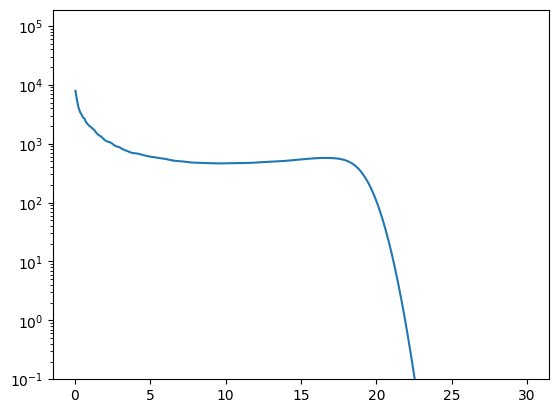

In [89]:
expo_30MeV_y_ER = ER_function_improve(expo_30MeV_x,expo_30MeV_x, expo_30MeV_y, 0.113, 0.065, 0.06)
plt.plot(expo_30MeV_x,expo_30MeV_y_ER)
plt.yscale('log')
plt.ylim(0.1,)

In [39]:
raw_27MeV =np.loadtxt('../../data/30MeV_neutron_response/3in_EJ309_N_response_10cm_plate_all_in_one_27.0MeV.txt')
birks_27MeV_x, birks_27MeV_y = sorting(raw_27MeV[:,1],300,0,30)
expo_27MeV_x, expo_27MeV_y = sorting(raw_27MeV[:,2],300,0,30)

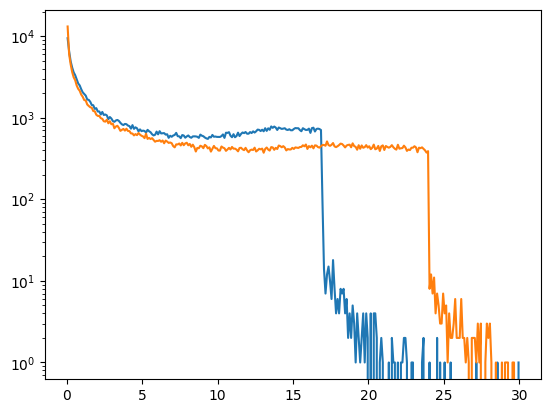

In [37]:
plt.plot(expo_27MeV_x, expo_27MeV_y)
plt.plot(birks_27MeV_x, birks_27MeV_y)
plt.yscale('log')

In [32]:
raw_21MeV =np.loadtxt('../../data/30MeV_neutron_response/3in_EJ309_N_response_10cm_plate_all_in_one_21.0MeV.txt')
birks_21MeV_x, birks_21MeV_y = sorting(raw_21MeV[:,1],300,0,30)
expo_21MeV_x, expo_21MeV_y = sorting(raw_21MeV[:,2],300,0,30)

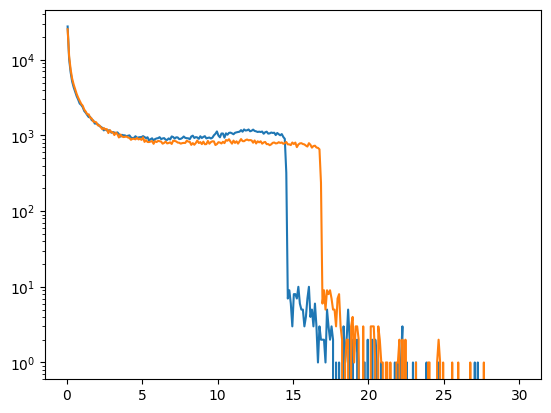

In [34]:
plt.plot(expo_21MeV_x, expo_21MeV_y)
plt.plot(birks_21MeV_x, birks_21MeV_y)
plt.yscale('log')

In [27]:
raw_17MeV =np.loadtxt('../../data/30MeV_neutron_response/3in_EJ309_N_response_10cm_plate_all_in_one_17.0MeV.txt')
birks_17MeV_x, birks_17MeV_y = sorting(raw_17MeV[:,1],300,0,30)
expo_17MeV_x, expo_17MeV_y = sorting(raw_17MeV[:,2],300,0,30)

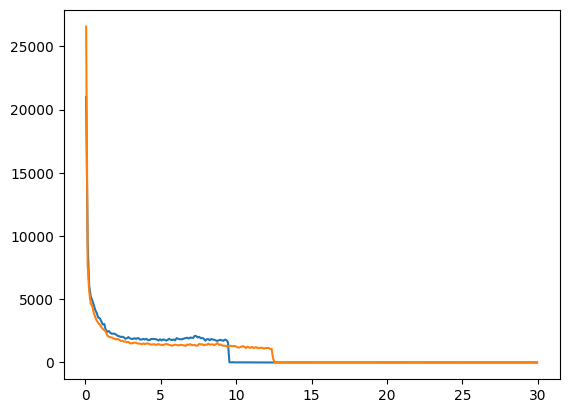

In [28]:
plt.plot(expo_17MeV_x, expo_17MeV_y)
plt.plot(birks_17MeV_x, birks_17MeV_y )
